In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_test = pd.read_parquet('proyecto_ML/x_test.parquet')
df_train = pd.read_parquet('proyecto_ML/x_train.parquet')

In [ ]:
df_train.info()

In [3]:
# Separando features de target
X = df_train.iloc[:, [0,83]].values
Y = df_train.iloc[:, 84].values

In [4]:
# Separamos los datos de entrenamiento de los datos de prueba
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [5]:
# Estandarizamos 
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [6]:
# Entrenamos
from sklearn.svm import SVC

classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_Train, Y_Train)

SVC(kernel='linear', random_state=0)

In [7]:
# Predecimos
Y_Pred = classifier.predict(X_Test)

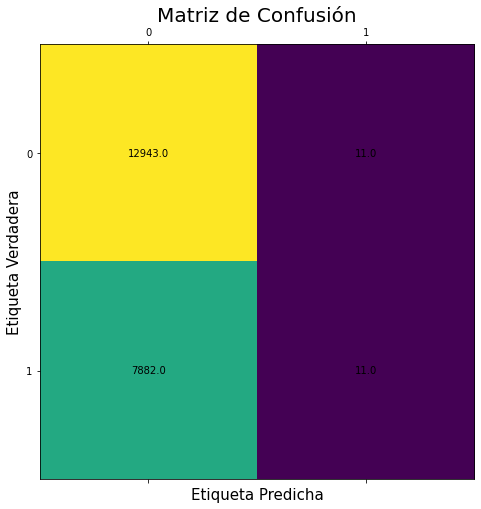

In [8]:
# Matriz de confusión 

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_Test, Y_Pred)

fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [9]:
print(classification_report(Y_Test, Y_Pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77     12954
           1       0.50      0.00      0.00      7893

    accuracy                           0.62     20847
   macro avg       0.56      0.50      0.38     20847
weighted avg       0.58      0.62      0.48     20847

